# This Computer vision model is developed by ML Engineers in MNU 🏆
### you can download data from here https://www.kaggle.com/datasets/biswaranjanrao/anemia-dataset/data


# Anemia Detection using Computer Vision
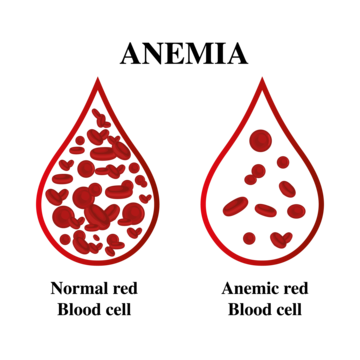

# Importing needed libraries

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub # here we can access pretrained model then we will fine-tune it according to our model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator # we are using this lib for data augmentation as our train data is small
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2
import os
import numpy as np
import pathlib

## Importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
dataset_path = '/content/drive/MyDrive/Ai_ProjectData/anemia detection.v1i.folder'
print(os.listdir(dataset_path))

['README.roboflow.txt', 'README.dataset.txt', 'train', 'test', 'valid']


In [ ]:
import os
dataset_path = '/content/drive/MyDrive/Ai_ProjectData/anemia detection.v1i.folder'

print("Train:", os.listdir(os.path.join(dataset_path, 'train')))
print("Valid:", os.listdir(os.path.join(dataset_path, 'valid')))
print("Test:", os.listdir(os.path.join(dataset_path, 'test')))

Train: ['normal', 'anemia']
Valid: ['anemia', 'normal']
Test: ['normal', 'anemia']


# Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Loading data
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    os.path.join(dataset_path, 'valid'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 204 images belonging to 2 classes.
Found 41 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


## Visualizing a batch of the training data

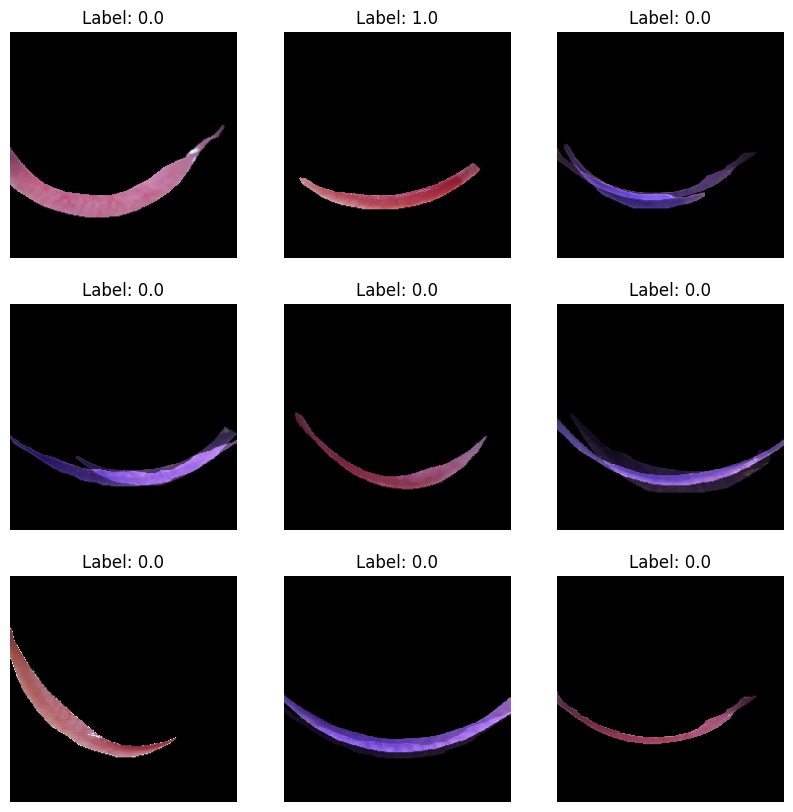

In [ ]:
import matplotlib.pyplot as plt

# Visualize a batch of training data
images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()


# Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Defining the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # we are using 'softmax' because it's a multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.6098 - loss: 0.6975 - val_accuracy: 0.8293 - val_loss: 0.3941
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.8619 - loss: 0.3561 - val_accuracy: 0.8293 - val_loss: 0.2900
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8842 - loss: 0.2691 - val_accuracy: 0.8293 - val_loss: 0.4609
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.9239 - loss: 0.1945 - val_accuracy: 0.8780 - val_loss: 0.2933
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.9694 - loss: 0.1465 - val_accuracy: 0.8780 - val_loss: 0.3302
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9827 - loss: 0.0748 - val_accuracy: 0.8537 - val_loss: 0.4161
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9988 - loss: 0.0225 - val_accuracy: 0.8293 - val_loss: 0.5324
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 0.8537 - val_loss: 0.6207
Epoch 9/10
7/7 ━━━━

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8519 - loss: 1.1434
Test Accuracy: 0.85


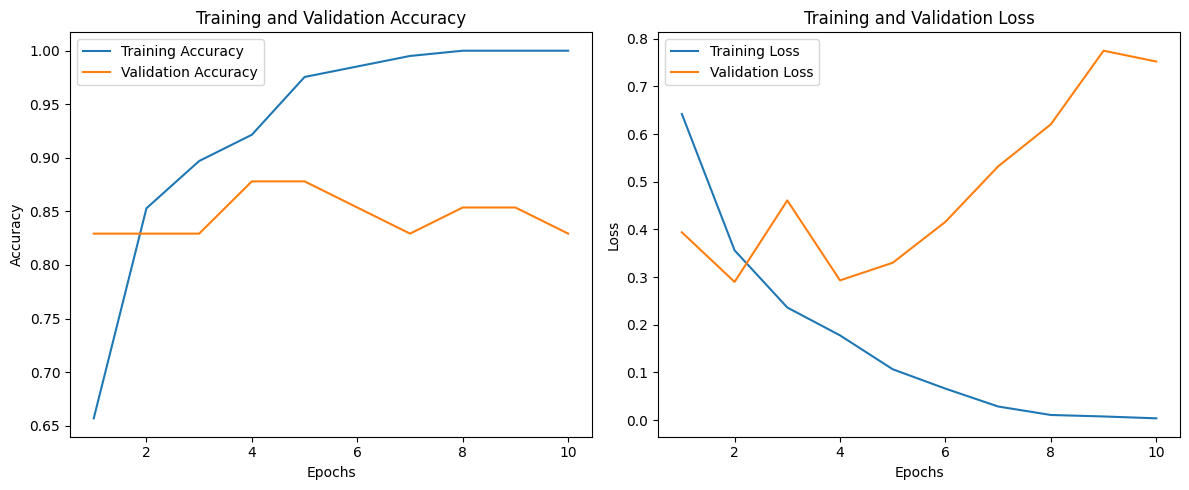

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy'] # here we extract data from the history object
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Saving model as .h5 file

In [ ]:
from tensorflow.keras.models import load_model
model.save('anemia_detection_model.h5')
model = load_model('anemia_detection_model.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

test_image_path = '/content/drive/MyDrive/Ai_ProjectData/anemia detection.v1i.folder/test/anemia/24_anemia_italia_png_jpg.rf.45a7221fdc562555ac39db3979b0f683.jpg'

# Load and preprocess the image
IMG_SIZE = (224, 224)
image = load_img(test_image_path, target_size=IMG_SIZE)
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension


# Testing model

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

test_image_path = '/content/drive/MyDrive/Ai_ProjectData/anemia detection.v1i.folder/test/anemia/24_anemia_italia_png_jpg.rf.45a7221fdc562555ac39db3979b0f683.jpg'
image = load_img(test_image_path, target_size=(224, 224))
image_array = img_to_array(image) / 255.0  # Normalizing the image
image_array = np.expand_dims(image_array, axis=0)

prediction = model.predict(image_array)

# Mapping prediction to class
predicted_class = 'anemia' if prediction[0][0] > 0.5 else 'normal'

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted Class: normal


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Ai_ProjectData/anemia detection.v1i.folder/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")



Found 27 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8519 - loss: 1.1434
Test Loss: 1.1433931589126587
Test Accuracy: 0.8518518805503845


# Plotting final results

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step


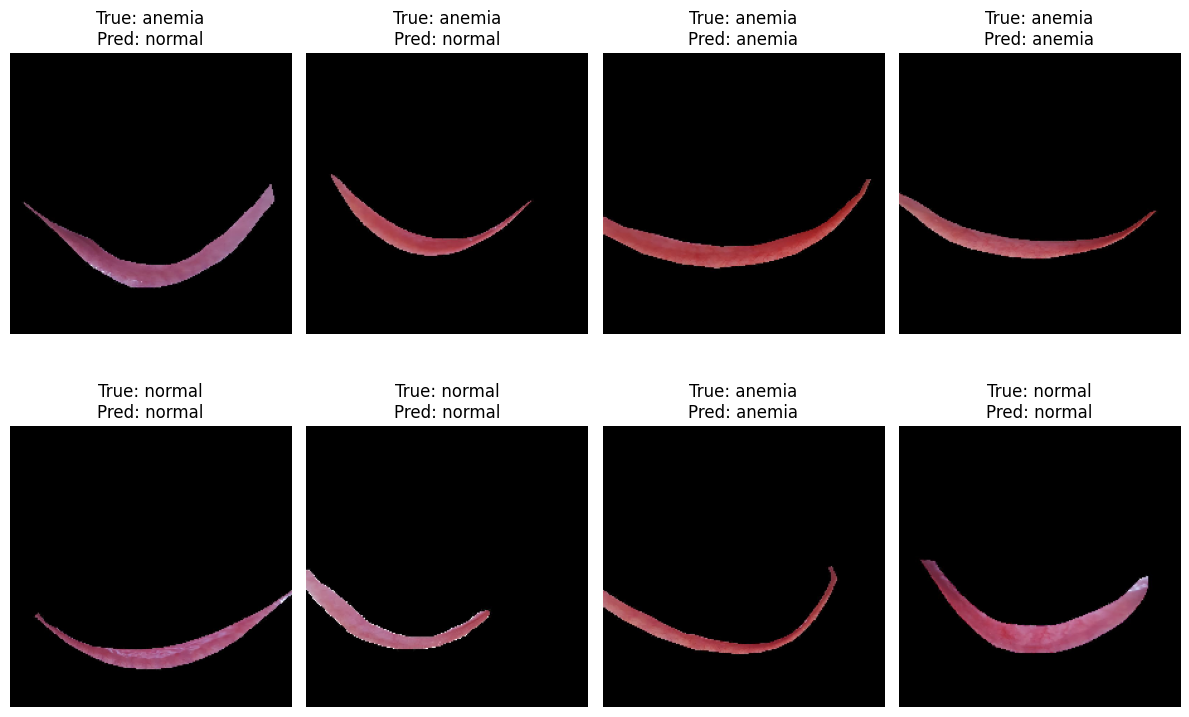

In [ ]:
import matplotlib.pyplot as plt

batch_images, batch_labels = next(test_generator)
predictions = model.predict(batch_images)

plt.figure(figsize=(12, 8))
for i in range(8):  # Display first 8 images
    plt.subplot(2, 4, i+1)
    plt.imshow(batch_images[i])
    true_label = 'anemia' if batch_labels[i] == 1 else 'normal'
    predicted_label = 'anemia' if predictions[i][0] > 0.5 else 'normal'
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()



# Deploying model to streamlit

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import streamlit as st
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
MODEL_PATH = 'anemia_detection_model.h5'
model = load_model(MODEL_PATH)

In [ ]:
IMG_SIZE = (224, 224)
CLASS_NAMES = {0: 'normal', 1: 'anemia'}

st.title("Anemia Detection using Deep Learning")

uploaded_file = st.file_uploader("Upload an image of a blood sample", type=["jpg", "jpeg", "png"]) # we enable any user to upload any image of types (png,jpg,jpeg)

if uploaded_file is not None:
    image = load_img(uploaded_file, target_size=IMG_SIZE)
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    st.image(image, caption="Uploaded Image", use_column_width=True)

    prediction = model.predict(image_array)
    predicted_class = CLASS_NAMES[1] if prediction[0][0] > 0.5 else CLASS_NAMES[0]

    st.write(f"### The image you have uploaded is: {predicted_class}")

    confidence = prediction[0][0] if predicted_class == 'anemia' else 1 - prediction[0][0]
    st.write(f"Confidence Score: {confidence:.2f}")

st.write("---")
st.write("Developed by AI Engineers in MNU for Anemia Detection using Deep Learning.")

2024-12-23 13:04:36.078 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 13:04:36.211 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-23 13:04:36.213 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 13:04:36.217 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 13:04:36.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 13:04:36.221 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 13:04:36.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 13:04:36.225 Thread 'MainThread': mi

CBC data labeled with the diagnosis of Anemia type, The data collected among several CBCs data and diagnosed manually

*Data Dictionary:*
- HGB: The amount of hemoglobin in the blood, crucial for oxygen transport.
- PlT: The number of platelets in the blood, involved in blood clotting.
- WBC: The count of white blood cells, vital for immune response.
- RBC: The count of red blood cells, responsible for oxygen transport.
- MCV (Mean Corpuscular Volume): Average volume of a single red blood cell.
- MCH (Mean Corpuscular Hemoglobin): Average amount of hemoglobin per red blood cell.
- MCHC (Mean Corpuscular Hemoglobin Concentration): Average concentration of hemoglobin in red blood cells.
- PDW: a measurement of the variability in platelet size distribution in the blood
- PCT: A procalcitonin test can help your health care provider diagnose if you have sepsis from a bacterial infection or if you have a high risk of developing sepsis
- Diagnosis: Anemia type based on the CBC parameters

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Load Data

In [ ]:
df = pd.read_csv("diagnosed_cbc_data_v4.csv")

In [ ]:
df.head(5)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


#### Check null Values

In [ ]:
df.isnull().value_counts()

WBC    LYMp   NEUTp  LYMn   NEUTn  RBC    HGB    HCT    MCV    MCH    MCHC   PLT    PDW    PCT    Diagnosis
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False        1281
Name: count, dtype: int64

In [ ]:
df.describe()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,7.862717,25.845000,77.511000,1.880760,5.140940,4.708267,12.184551,46.1526,85.793919,32.084840,31.739149,229.981421,14.312512,0.260280
std,3.564466,7.038728,147.746273,1.335689,2.872294,2.817200,3.812897,104.8861,27.177663,111.170756,3.300352,93.019336,3.005079,0.685351
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.0000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000
25%,6.000000,25.845000,71.100000,1.880760,5.100000,4.190000,10.800000,39.2000,81.200000,25.500000,30.600000,157.000000,13.300000,0.170000
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.300000,46.1526,86.600000,27.800000,32.000000,213.000000,14.312512,0.260280
75%,8.680000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.1526,90.200000,29.600000,32.900000,293.000000,14.700000,0.260280
max,45.700000,91.400000,5317.000000,41.800000,79.000000,90.800000,87.100000,3715.0000,990.000000,3117.000000,92.800000,660.000000,97.000000,13.600000


In [ ]:
df["Diagnosis"].value_counts()

NameError: name 'df' is not defined

Diagnosis:
- Healthy                           
- Normocytic hypochromic anemia     
- Normocytic normochromic anemia    
- Iron deficiency anemia            
- Thrombocytopenia                   
- Other microcytic anemia            
- Leukemia                           
- Macrocytic anemia                  
- Leukemia with thrombocytopenia     

> Label Diagnosis

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["Diagnosis"]=lb.fit_transform(df["Diagnosis"])

In [ ]:
df["Diagnosis"].value_counts()

Diagnosis
0    336
5    279
6    269
1    189
8     73
7     59
2     47
4     18
3     11
Name: count, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='WBC'>

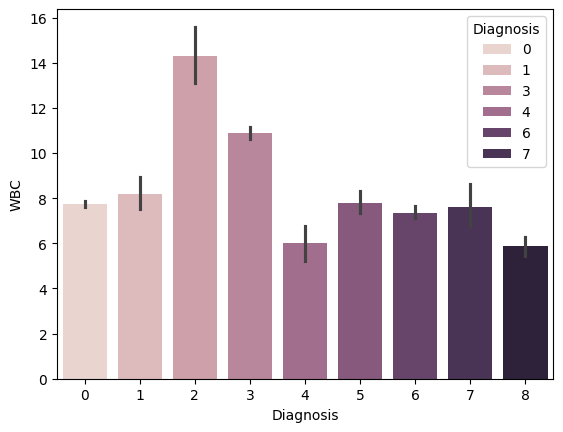

In [ ]:
# sns.jointplot(df,x="WBC",y="Diagnosis")
sns.barplot(df,x="Diagnosis",y="WBC" , hue=df["Diagnosis"])

<Axes: xlabel='Diagnosis', ylabel='LYMp'>

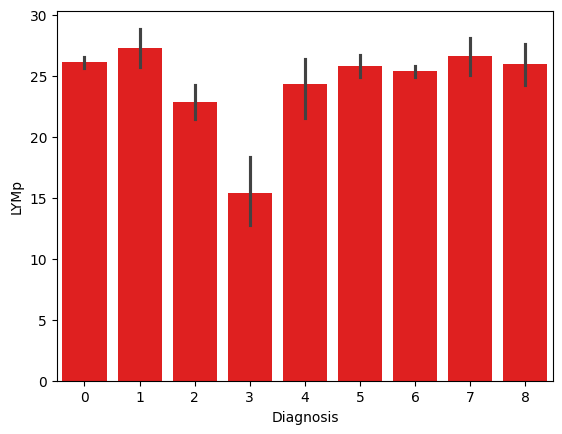

In [ ]:

sns.barplot(df,x="Diagnosis",y="LYMp" ,color="r" )

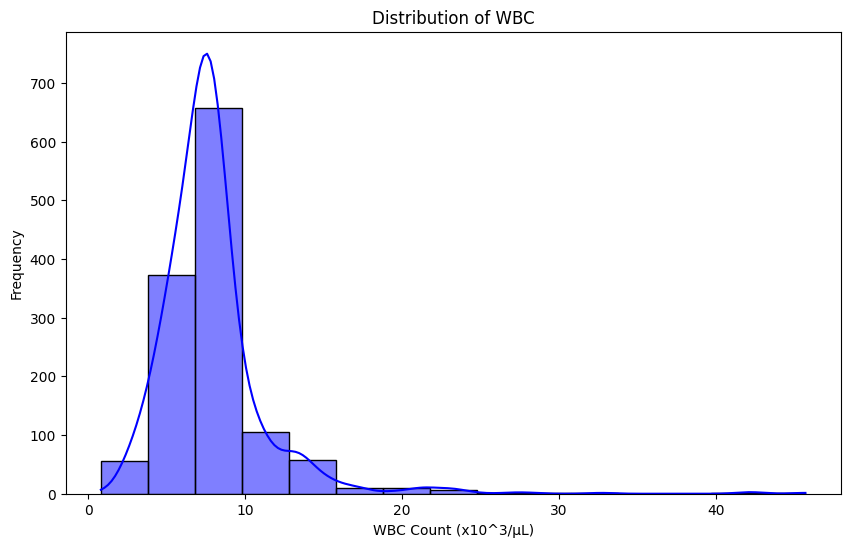

In [ ]:

# 1. Distribution of features
plt.figure(figsize=(10, 6))
sns.histplot(df["WBC"], kde=True, bins=15, color='blue')
plt.title("Distribution of WBC")
plt.xlabel("WBC Count (x10^3/µL)")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'correlation heatmap')

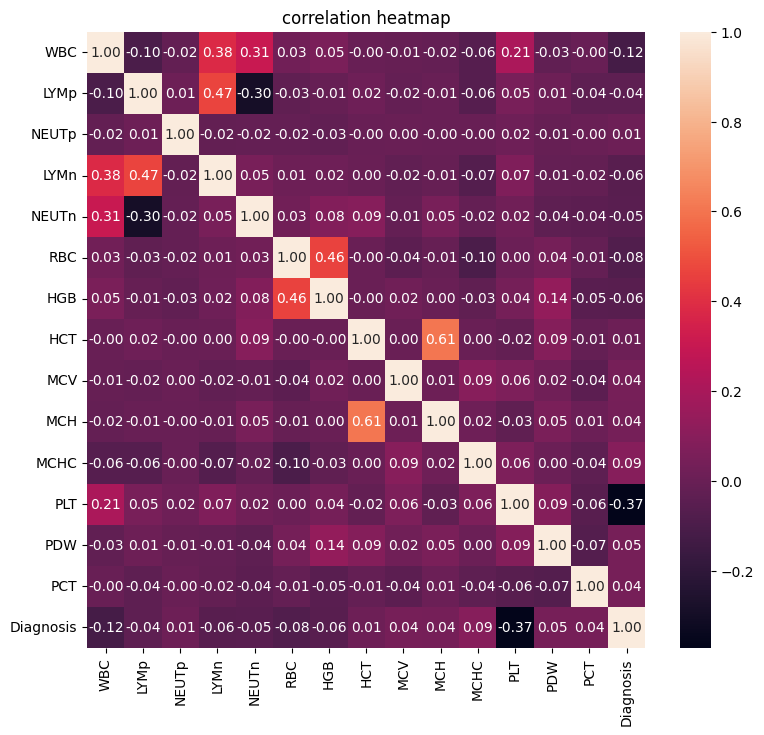

In [ ]:
plt.figure(figsize=(9,8))
corr= df.corr()
sns.heatmap(corr,annot=True,fmt="0.2f")
plt.title("correlation heatmap")

<Axes: xlabel='Diagnosis'>

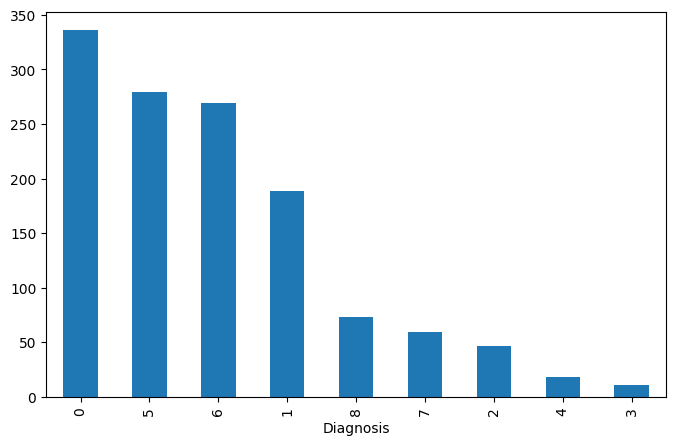

In [ ]:
plt.figure(figsize=(8,5))
diagnosis_counts=df["Diagnosis"].value_counts()
diagnosis_counts.plot(kind="bar")

<Axes: ylabel='count'>

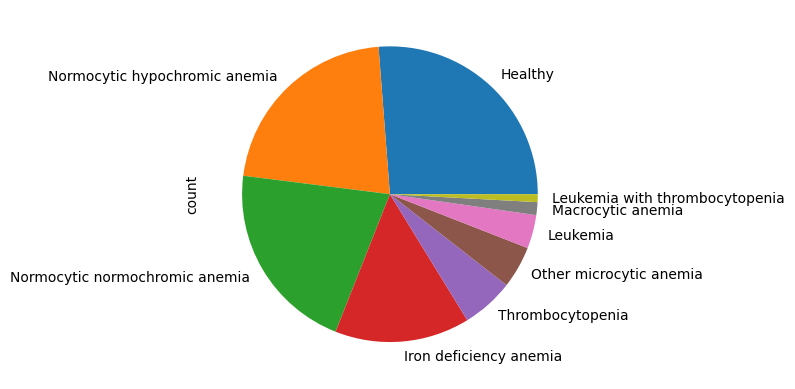

In [ ]:
labels={"Healthy":0,
        "Normocytic hypochromic anemia":5,
        "Normocytic normochromic anemia":6,
        "Iron deficiency anemia":1,
        "Thrombocytopenia":8,
        "Other microcytic anemia":7 ,
        "Leukemia":2 ,
        "Macrocytic anemia":4,
        "Leukemia with thrombocytopenia":3     }
diagnosis_counts.plot(kind="pie",labels=labels)

In [ ]:
plt.figure(figsize=(9,8))
fig = px.pie(df, names="Diagnosis", title="Diagnosis Distribution Pie Chart")
fig.update_traces(textinfo="percent+label")


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'Diagnosis=%{label}<extra></extra>',
              'labels': array([5, 5, 1, ..., 0, 0, 0]),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'textinfo': 'percent+label',
              'type': 'pie'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Diagnosis Distribution Pie Chart'}}
})

<Figure size 900x800 with 0 Axes>

C:\Users\al\AppData\Local\Temp\ipykernel_10948\99536414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Diagnosis", y="MCV", palette="Set3")


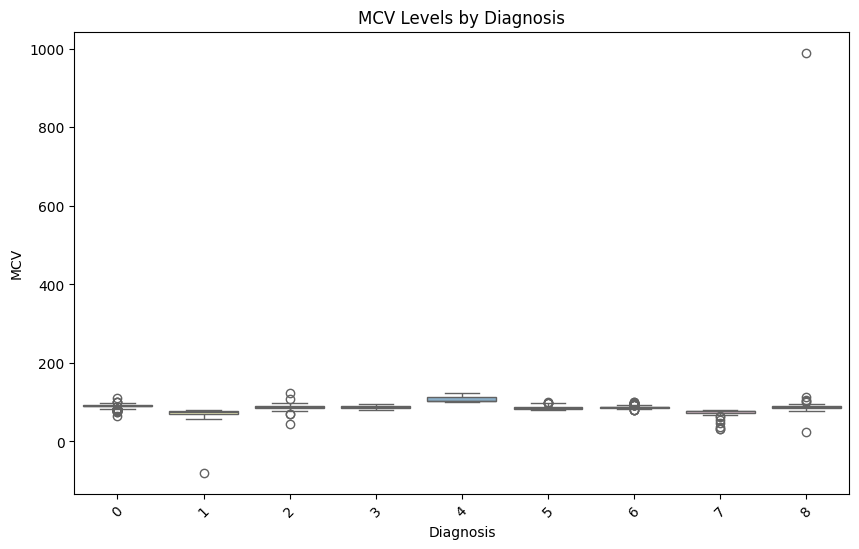

In [ ]:
# 4. Boxplot for group comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Diagnosis", y="MCV", palette="Set3")
plt.title("MCV Levels by Diagnosis")
plt.xticks(rotation=45)
plt.show()

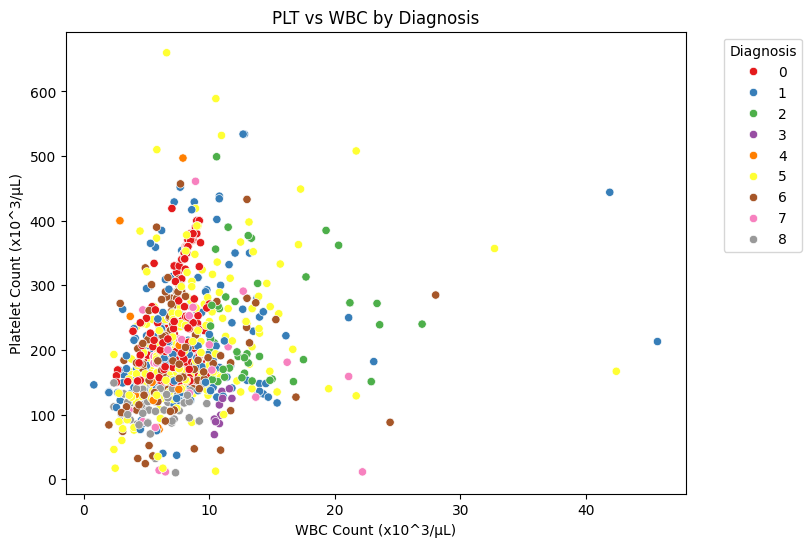

In [ ]:

# 5. Scatterplot (PLT vs WBC)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="WBC", y="PLT", hue="Diagnosis", palette="Set1")
plt.title("PLT vs WBC by Diagnosis")
plt.xlabel("WBC Count (x10^3/µL)")
plt.ylabel("Platelet Count (x10^3/µL)")
plt.legend(title="Diagnosis", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

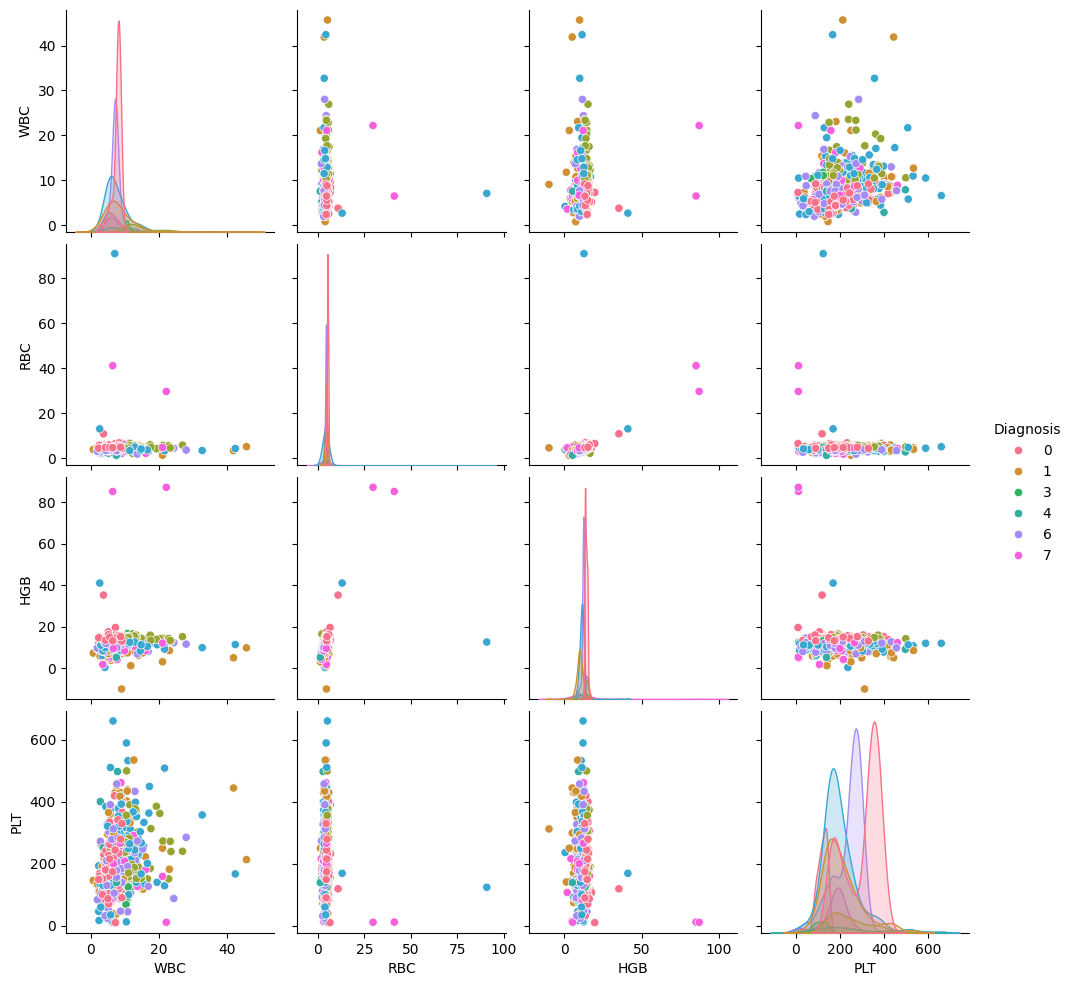

In [ ]:
sns.pairplot(df, vars=["WBC", "RBC", "HGB", "PLT"], hue="Diagnosis", palette="husl", diag_kind="kde")
plt.show()


In [1]:

data = [
    {"type": "Healthy", "symptoms": ["No symptoms or occasional fatigue"]},
    {"type": "Normocytic anemia", "symptoms": ["Fatigue", "Paleness", "Shortness of breath", "Dizziness"]},
    {"type": "Microcytic anemia", "symptoms": ["Fatigue", "Weakness", "Shortness of breath", "Pale skin"]},
    {"type": "Macrocytic anemia", "symptoms": ["Fatigue", "Muscle weakness", "Pale or yellowish skin", "Shortness of breath"]},
    {"type": "Thrombocytopenia", "symptoms": ["Easy bruising", "Bleeding gums", "Nosebleeds", "Prolonged bleeding"]},
    {"type": "Leukemia", "symptoms": ["Frequent infections", "Fatigue", "Weight loss", "Easy bruising", "Swollen lymph nodes"]},
    {"type": "Iron deficiency anemia", "symptoms": ["Extreme fatigue", "Weakness", "Cold hands and feet", "Brittle nails", "Cravings for non-nutritive substances like ice or dirt"]},
    {"type": "Other microcytic anemia", "symptoms": ["Fatigue", "Weakness", "Pale skin", "Shortness of breath"]},
    {"type": "Normocytic hypochromic anemia", "symptoms": ["Mild fatigue", "Pale skin", "Dizziness"]},
    {"type": "Normocytic normochromic anemia", "symptoms": ["Mild fatigue", "Weakness", "Shortness of breath"]},
    {"type": "Leukemia with thrombocytopenia", "symptoms": ["Fatigue", "Easy bruising", "Prolonged bleeding", "Frequent infections"]},
]

goal_symptoms = ["Fatigue", "Paleness", "Shortness of breath", "Dizziness"]

# this function to find the number of matching symptoms
def match_count(disease_symptoms, goal_symptoms):
    return sum(1 for symptom in disease_symptoms if symptom.lower() in map(str.lower, goal_symptoms))

# BFS search for matching diseases
def bfs_search(data, goal_symptoms):
    queue = data[:]
    visited = set()  # we used set function to prevent re-processing of the model

    while queue:
        current_disease = queue.pop(0)

        # Check for exact match
        if set(map(str.lower, current_disease['symptoms'])) == set(map(str.lower, goal_symptoms)):
            return current_disease

        visited.add(current_disease['type'].lower())

        for neighbor in data:  # neighbor here refers to partial matches
            if neighbor['type'].lower() not in visited and match_count(neighbor['symptoms'], goal_symptoms) > 0:
                queue.append(neighbor)
                visited.add(neighbor['type'].lower())

    return None

def find_partial_matches(data, goal_symptoms):
    return [
        f"{disease['type']} (Matching symptoms: {', '.join(set(map(str.lower, disease['symptoms'])).intersection(map(str.lower, goal_symptoms)))})"
        for disease in data if match_count(disease['symptoms'], goal_symptoms) > 0
    ]

def search_anemia(data, goal_symptoms):
    result = bfs_search(data, goal_symptoms)

    if result:
        print(f"Anemia found: {result['type']}")
    else:
        print("No exact match found.")
        partial_matches = find_partial_matches(data, goal_symptoms)
        if partial_matches:
            print("Partial matches for the symptoms provided:")
            for match in partial_matches:
                print(match)
        else:
            print("No diseases match the provided symptoms.")

search_anemia(data, goal_symptoms)


Anemia found: Normocytic anemia
